In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import streamlit as st

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud,STOPWORDS


In [3]:
df = pd.read_csv("train.csv")

In [4]:
df.head()

,col1,col2,output
0,-38.366669,113.000000,1
1,-39.818572,123.943369,1
2,-55.638240,114.551862,1
3,-36.378005,95.616515,1
4,-39.366669,112.000000,1


In [5]:
df.shape

(1278, 3)

In [6]:
df.columns

Index(['col1', 'col2', 'output'], dtype='object')

In [7]:
df.isnull().sum()

col1      0
col2      0
output    0
dtype: int64

In [8]:
df["col1"].value_counts()

 117.633331    8
-120.366669    7
 113.633331    6
-33.366669     6
-34.366669     6
              ..
-26.012431     1
 9.465297      1
-30.549717     1
-40.334490     1
 53.481772     1
Name: col1, Length: 1124, dtype: int64

2021-03-10 15:05:15.146 INFO    numexpr.utils: NumExpr defaulting to 8 threads.


<AxesSubplot:xlabel='col1', ylabel='Density'>

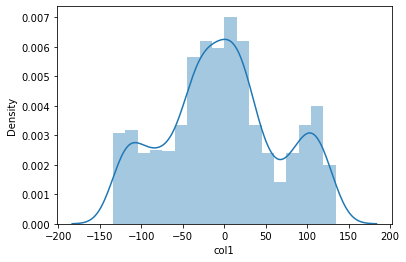

In [9]:
sns.distplot(df["col1"])

In [10]:
df["col2"].value_counts()

 122.000000    13
-94.000000     11
-96.000000      8
 33.000000      6
 3.000000       6
               ..
-74.720797      1
 31.469712      1
 106.164214     1
-76.043854      1
-92.916308      1
Name: col2, Length: 1109, dtype: int64

<AxesSubplot:xlabel='col2', ylabel='Density'>

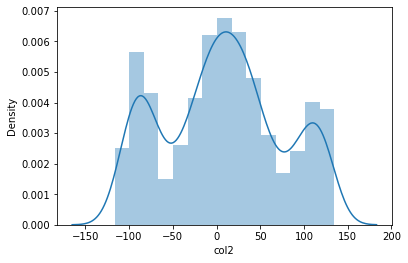

In [11]:
sns.distplot(df["col2"])

<AxesSubplot:xlabel='output', ylabel='count'>

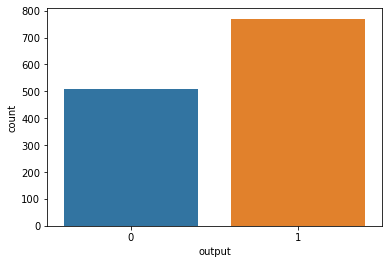

In [12]:
fig = plt.figure()
sns.countplot(x='output', data=df)


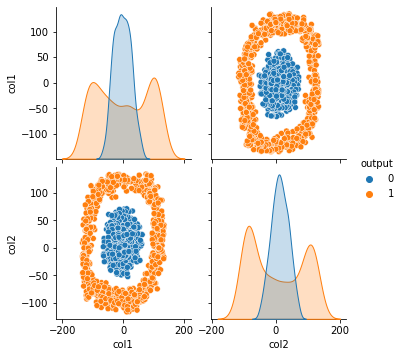

In [13]:
sns.pairplot(df, hue="output")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X= df.drop(['output'],axis=1)
y= df['output']

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((1022, 2), (256, 2), (1022,), (256,))

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [18]:
import time
start_time_log = time.time()

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
y_pred1 = model_lr.predict(X_test)

acc1 = accuracy_score(y_test,y_pred1)
print("Accuracy of LogisticRegression is",acc1)

end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Accuracy of LogisticRegression is 0.59375
Duration : 0.10405707359313965


In [19]:
import time
start_time_log = time.time()

model_linear = SVC(kernel='linear')
model_linear.fit(X_train,y_train)
y_pred2 = model_linear.predict(X_test)

acc2 =accuracy_score(y_test,y_pred2)
print("Accuracy of SVC is",acc2)
     
end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Accuracy of SVC is 0.60546875
Duration : 172.07790803909302


In [20]:
import time
start_time_log = time.time()

model_rbf = SVC(kernel='rbf')
model_rbf.fit(X_train,y_train)
y_pred3 = model_rbf.predict(X_test)

acc3 =accuracy_score(y_test,y_pred3)
print("Accuracy of SVC is",acc3)
     
end_time_log = time.time()
print('Duration :', end_time_log - start_time_log)

Accuracy of SVC is 1.0
Duration : 0.014972925186157227


In [21]:
from pickle import dump

In [22]:
dump(model_rbf, open('Pickle\svm_rbf.pkl', 'wb'))

In [23]:
from pickle import load
def predict(arr):
        
    # Loading pretrained logistic classifier from pickle file
    classifier = load(open('pickle\svm_rbf.pkl', 'rb'))
    
    # Prediction
    prediction = classifier.predict(arr)
    
    return prediction

In [24]:
Value_1=input('Enter Value_1 :')
Value_2=input('Enter Value_2 :')
arr = np.array([Value_1,Value_2]).reshape(1,-1)
 
prediction = predict(arr)
print(prediction)

Enter Value_1 :6000
Enter Value_2 :5400
[1]
